# Advertising Prediction

In [1]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the advertising dataset
data = pd.read_csv("datasets/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# summary about the data
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [6]:
# checking null values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

checking the relationship between variables and target column

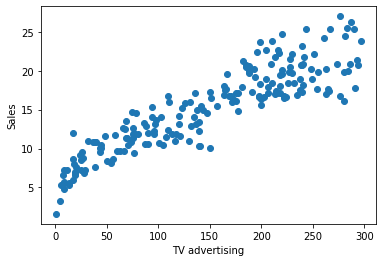

In [13]:
plt.scatter(data.TV,data.Sales)
plt.xlabel("TV advertising")
plt.ylabel("Sales")
plt.show()

from the above figure the relation between TV and Sales is linear

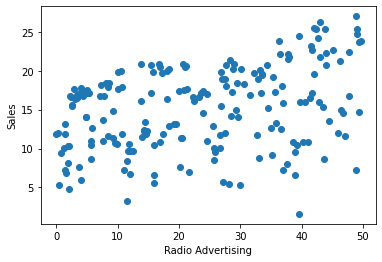

In [14]:
plt.scatter(data.Radio, data.Sales)
plt.xlabel("Radio Advertising")
plt.ylabel("Sales")

plt.show()

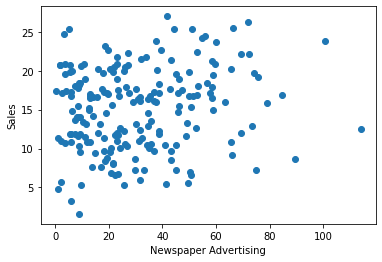

In [15]:
plt.scatter(data.Newspaper, data.Sales)
plt.xlabel("Newspaper Advertising")
plt.ylabel("Sales")
plt.show()

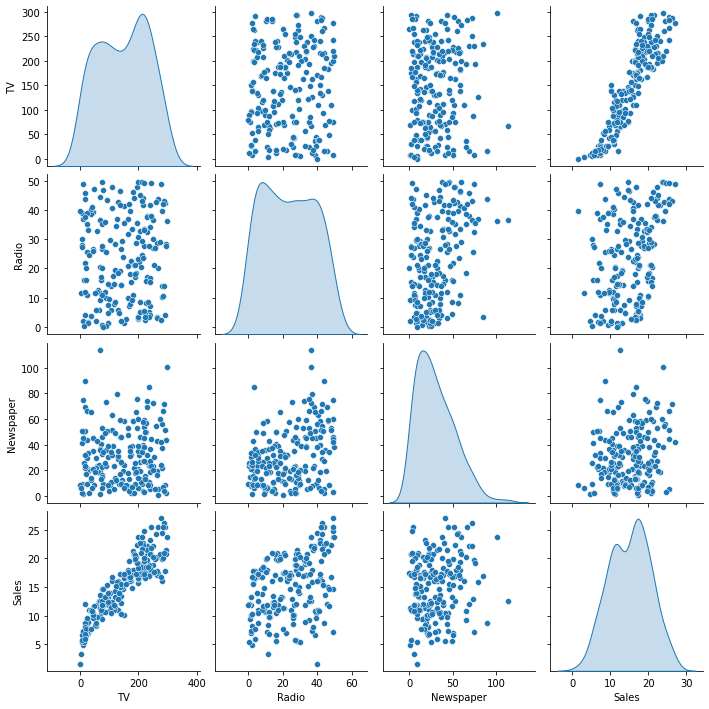

In [17]:
# bivariate analysis
sns.pairplot(data,diag_kind = "kde")

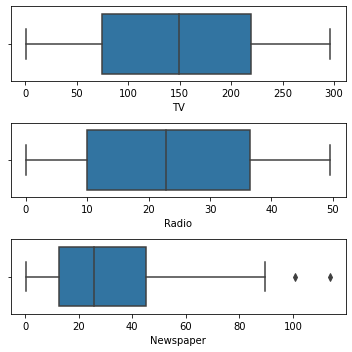

In [34]:
# outlier Analysis
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data["TV"], ax = axes[0])
plt2 = sns.boxplot(data["Radio"], ax = axes[1])
plt3 = sns.boxplot(data["Newspaper"], ax = axes[2])
plt.tight_layout()
plt.show()

There are no considerable outliers present in the data

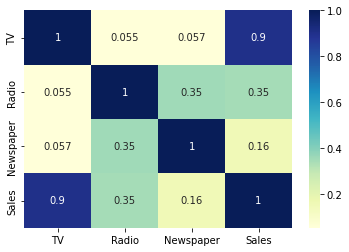

In [35]:
# correlation between different variables

sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

As is visible from the pair plot and the heatmap, the variable TV seems to be most correlated with Sales.

# Linear Regression

A linear Regression Model to predict sales based on TV advertisement

In [135]:
# Using 1 Variable
# features columns
X = data["TV"].values
# traget columns
y = data["Sales"].values

In [136]:
# spliting the data in training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3
                                                    , random_state = 42)

In [137]:
# shape 
X_train.shape, y_train.shape


((140,), (140,))

In [138]:
X_test.shape, y_test.shape

((60,), (60,))

In [139]:
# reshape the arrays in 2d arrays
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

Building a Linear Model

In [140]:
# linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [141]:
# predict on training data
predict_train = lreg.predict(X_train)
# predict on test data
predict_test = lreg.predict(X_test)

In [142]:
# checking the model

In [143]:
lreg.coef_

array([[0.05483488]])

In [144]:
lreg.intercept_

array([7.20655455])

In [145]:
# performance of the model

from sklearn.metrics import mean_squared_error, r2_score

# mse for training set
mse = mean_squared_error(y_train, predict_train)
mse

5.265926492632754

In [146]:
# mse for testing set
mse_test = mean_squared_error(y_test, predict_test)
mse_test

5.179525402166653

In [147]:
# rmse for training set
print("Root Mean Squared Error {}".format(np.sqrt(mse)))

Root Mean Squared Error 2.2947606612962392


In [148]:
# rmse for testing set
print("Root Mean Squared Error {}".format(np.sqrt(mse_test)))

Root Mean Squared Error 2.2758570698017597


In [149]:
# r squared for training set
r2_score(y_train, predict_train)

0.799626928219267

In [150]:
# r squared for testing set 
r2_score(y_test,predict_test)

0.814855389208679

R**2 is basically how perfectly your line is fit

0 is worst fit

1 is best fit

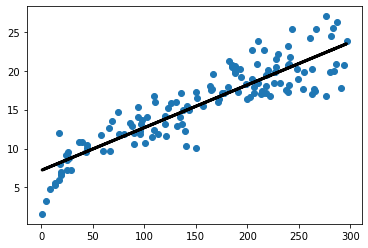

In [151]:
# visualizing Our line
plt.scatter(X_train, y_train)
plt.plot(X_train, predict_train, "black", linewidth = 3)
plt.show()

Checking model average performance using cross validation


In [152]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results= cross_val_score(reg,X.reshape(-1,1),y.reshape(-1,1), cv=5)
# it returns the R^2 values of 5 folds
print(cv_results)

# mean of the results
print(np.mean(cv_results))

[0.78722103 0.8390842  0.83304785 0.76034408 0.79806637]
0.8035527049128344


Model average performance is 0.80

linear regression model with Tv and Radio as features

In [81]:
X = data.iloc[:,:2]
y = data.iloc[:,-1]

In [82]:
# train_test_split

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)


In [83]:
X_train.shape, y_train.shape


((140, 2), (140,))

In [84]:
X_test.shape, y_test.shape

((60, 2), (60,))

In [85]:
X_train.head()

,TV,Radio
169,284.3,10.6
97,184.9,21.0
31,112.9,17.4
12,23.8,35.1
35,290.7,4.1


In [86]:
# fitting the model

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [87]:
# making prediction
predict_train = lreg.predict(X_train)
predict_test  = lreg.predict(X_test)

checking the model

In [88]:
lreg.coef_

array([0.05360953, 0.10653078])

In [89]:
lreg.intercept_

4.892050035638782

preformance of model

In [91]:
mse = mean_squared_error(y_train, predict_train)
print("mean squred error on training data: ",mse)
print("Root mean square error on training :", np.sqrt(mse))


mean squred error on training data:  2.862867748478891
Root mean square error on training : 1.6920011077061654


In [92]:
mse_test = mean_squared_error(y_test, predict_test)
print("mean squred error on test data: ",mse_test)
print("Root mean square error on test :", np.sqrt(mse_test))


mean squred error on test data:  2.408164979864959
Root mean square error on test : 1.5518263368898464


In [95]:
# r_squared for training set
print("r2 score for training set: ",r2_score(y_train, predict_train))
print("r2 score for testing set: ",r2_score(y_test,predict_test))


r2 score for training set:  0.8910653983364079
r2 score for testing set:  0.9139189919346897


# Linear Model with 3 variables

In [96]:
X = data.iloc[:,:3]
y = data.iloc[:,-1]

In [97]:
# train_test_split

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)


In [98]:
X_train.shape, y_train.shape

((140, 3), (140,))

In [99]:
X_test.shape, y_test.shape

((60, 3), (60,))

In [100]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [101]:
# fitting the model

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [102]:
# making prediction

predict_train = lreg.predict(X_train)
predict_test = lreg.predict(X_test)

In [103]:
# checking model coefficiants and itercept

lreg.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [104]:
lreg.intercept_

4.743766701589683

Performance of Model

In [105]:
mse = mean_squared_error(y_train, predict_train)
print("mean squred error on training data: ",mse)
print("Root mean square error on training :", np.sqrt(mse))


mean squred error on training data:  2.839232660754424
Root mean square error on training : 1.685002273219364


In [106]:
mse_test = mean_squared_error(y_test, predict_test)
print("mean squred error on test data: ",mse_test)
print("Root mean square error on test :", np.sqrt(mse_test))


mean squred error on test data:  2.5416240362291465
Root mean square error on test : 1.5942471691143587


In [107]:
# r_squared for training set
print("r2 score for training set: ",r2_score(y_train, predict_train))
print("r2 score for testing set: ",r2_score(y_test,predict_test))


r2 score for training set:  0.8919647339302077
r2 score for testing set:  0.90914843418498
